In [1]:
#Funciones auxiliares
def areaSignada(a, b, c): #de la practica 1A
     return ((b[0]-a[0])*(c[1]-a[1]) - (b[1]-a[1])*(c[0]-a[0])) / 2

def esConvexo(vertices, i):
    n = len(vertices)
    a = vertices[(i - 1) % n]
    b = vertices[i]
    c = vertices[(i + 1) % n]
    return areaSignada(a, b, c) > 0

def dist(p, q):
    return sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)

def enSegmento(p, s):
    if areaSignada(p, s[0], s[1]) != 0:
        return False
    return float(dist(p, s[0])) + float(dist(p, s[1])) == float(dist(s[0], s[1]))

def testInterseccionSegmentos(p, q):
    if (areaSignada(p[0], p[1], q[0]) * areaSignada(p[0], p[1], q[1]) < 0 and
        areaSignada(q[0], q[1], p[0]) * areaSignada(q[0], q[1], p[1]) < 0):
        return True
    else:
        if enSegmento(p[0], q) or enSegmento(p[1], q) or enSegmento(q[0], p) or enSegmento(q[1], p):
            return True
        else:
            return False

def interseca(p1, p2, p3, p4):
    return testInterseccionSegmentos([p1, p2], [p3, p4])

def Xmin(p):
    return min(p)

def ordenAngular(p,C):
    derecha=[]
    izquierda=[]
    superior=[]
    inferior=[]
    for i in p:
        if i[0]>C[0]:
            derecha.append(i)
        elif i[0]<C[0]:
            izquierda.append(i)
        elif i[0]==C[0] and i[1]>C[1]:
            superior.append(i)
        elif i[0]==C[0] and i[1]<C[1]:
            inferior.append(i)
        
    derecha=sorted(derecha,key=lambda x:[(x[1]-C[1])/(x[0]-C[0]),dist(x,C)])
    izquierda=sorted(izquierda,key=lambda x:[(x[1]-C[1])/(x[0]-C[0]),dist(x,C)])
    superior=sorted(superior)
    inferior=sorted(inferior)
    if C in p:
        return [C]+derecha+superior+izquierda+inferior
    else:
        return derecha+superior+izquierda+inferior

def Graham(P):
    if len(P)<3:
        return P
    O=Xmin(P)
    Q=ordenAngular(P,O)
    i=1
    while i<len(Q)-1:
        if areaSignada(Q[i-1],Q[i],Q[i+1%len(Q)])<0:
            Q.pop(i)
            if i>0:
                i=i-1
        else:
            i=i+1
    return Q

def generar_poligono_simple(n):
    import random #importamos para que no haya conflictos
    vertices = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(n)]
    cx = sum(x for x, y in vertices) / n
    cy = sum(y for x, y in vertices) / n
    vertices.sort(key=lambda p: atan2(p[1]-cy, p[0]-cx)) 
    return vertices

In [2]:
#1.1. Estudie si el polígono es convexo.
def PoligonoConvexo(vertices): 
    n = len(vertices)
    vertices_convexos = []
    vertices_concavos = []

    for i in range(n): 
        vertice_anterior = vertices[i - 1] if i - 1 >= 0 else vertices[n - 1]
        vertice_actual = vertices[i]
        vertice_siguiente = vertices[i + 1] if i + 1 < n else vertices[0]
        
        if areaSignada(vertice_anterior, vertice_actual, vertice_siguiente) >= 0: 
            vertices_convexos.append(vertice_actual) 
        else: 
            vertices_concavos.append(vertice_actual)

    return len(vertices_concavos) == 0

False


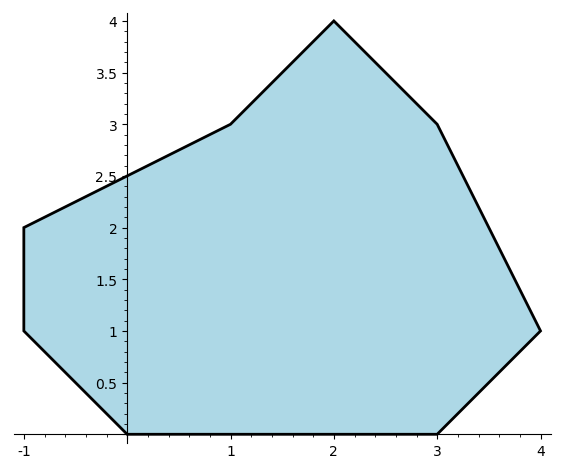

In [3]:
#1.2. Prueba de poligono convexo 
P = [[0, 0],[3, 0],[4, 1],[3, 3],[2, 4],[1, 3],[-1, 2],[-1, 1]]
es_convexo = PoligonoConvexo(P)
print(es_convexo)
polygon(P, color='lightblue', edgecolor='black', thickness=2)


In [4]:
#2.1. Determine si el punto es interior o exterior al polígono. 
def algoritmoRayos(punto, poligono):
    dentro_bool = False
    px, py = punto
    num_vertices = len(poligono)
    for i in range(num_vertices):
        x_i, y_i = poligono[i]
        x_j, y_j = poligono[(i + 1) % num_vertices]
        if ((y_i > py) != (y_j > py)) and (px < (x_j - x_i) * (py - y_i) / (y_j - y_i) + x_i):
            dentro_bool = not dentro_bool
    return dentro_bool

def punto_en_poligono(poligono, punto):
    poligono = [list(v) for v in poligono]
    punto = list(punto)

    dentro_bool = algoritmoRayos(punto, poligono)

    if dentro_bool:
        print(f"El punto {punto} está dentro del polígono.")
    else:
        print(f"El punto {punto} está fuera del polígono.")
    return dentro_bool

El punto [5, 4] está fuera del polígono.


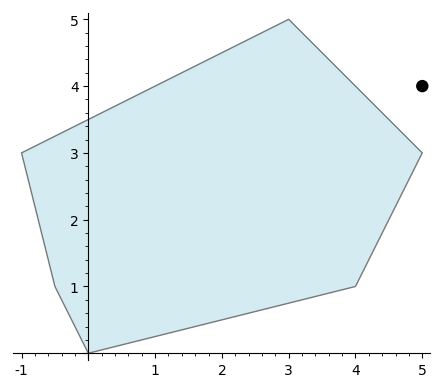

In [5]:
#2.2. Prueba de punto dentro de poligono

vertices_prueba = [[0,0], [4,1], [5,3], [3,5], [1,4], [-1,3], [-0.5,1]]
punto_prueba = [5,4]
esta_dentro = punto_en_poligono(vertices_prueba, punto_prueba)
figura_poligono = polygon(vertices_prueba, color='lightblue', edgecolor='black', alpha=0.5)
color_punto = 'red' if esta_dentro else 'black'
grafico_punto = point(punto_prueba, color=color_punto, size=80)
show(figura_poligono + grafico_punto)


In [6]:
#3.1. En caso de que el punto sea exterior calcule las tangentes del punto al polígono. 
def es_tangente(punto_exterior, poligono, i):
    n = len(poligono)
    vertice_anterior = poligono[(i - 1) % n]
    vertice_actual = poligono[i]
    vertice_siguiente = poligono[(i + 1) % n]

    izq1 = areaSignada(vertice_anterior, vertice_actual, punto_exterior) >= 0
    izq2 = areaSignada(vertice_actual, vertice_siguiente, punto_exterior) >= 0

    # XOR  
    es_tang = izq1 != izq2

    #verificamos que el segmento desde el punto exterior al vértice no atraviese ningún lado
    if es_tang:
        for j in range(n):
            lado = [poligono[j], poligono[(j+1) % n]]
            #ignoramos el lado que contiene el vértice actual
            if vertice_actual in lado:
                continue
            if interseca(punto_exterior, vertice_actual, lado[0], lado[1]):
                return False

    return es_tang


def tangentes_punto_poligono(punto_exterior, poligono):
    if punto_en_poligono(poligono, punto_exterior):
        print("El punto está dentro del polígono, no se pueden calcular tangentes.")
        return []

    tangentes = []
    for i in range(len(poligono)):
        if es_tangente(punto_exterior, poligono, i):
            tangentes.append(i)

    return tangentes

El punto [6, 2] está fuera del polígono.


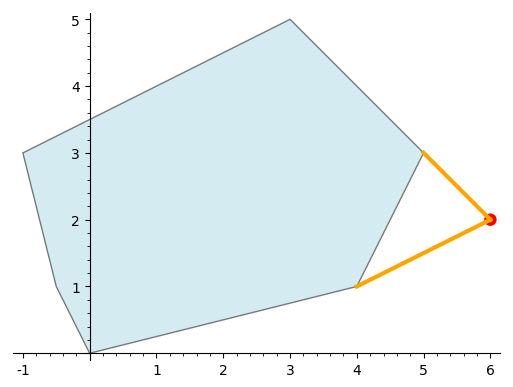

In [7]:
#3.2. Prueba de cálculo de tangentes 
poligono_prueba = [[0,0], [4,1], [5,3], [3,5], [1,4], [-1,3], [-0.5,1]]
punto_exterior = [6, 2]
tangentes = tangentes_punto_poligono(punto_exterior, poligono_prueba)
figura_poligono = polygon(poligono_prueba, color='lightblue', edgecolor='black', alpha=0.5)
grafico_punto = point(punto_exterior, color='red', size=80)
lineas_tangentes = sum([line([punto_exterior, poligono_prueba[i]], color='orange', thickness=3) for i in tangentes])
show(figura_poligono + grafico_punto + lineas_tangentes)


In [8]:
#4.1. Cálculo el área del polígono. 
def areaPoligono(p):
    area = 0
    for i in range(1,len(p)-1):
        area += areaSignada(p[0],p[i],p[i+1])
    return area

In [9]:
#4.2. Prueba de calcular área del polígono
poligono_prueba = [[0,0], [4,0], [5,3], [3,5], [1,4], [-1,3], [-0.5,1]]
area = areaPoligono(poligono_prueba)
print(f"Área del polígono: {area}")

Área del polígono: 21.2500000000000


In [10]:
#5.1.Cálculo de diagonales internas y externas 
def esDiagonalValida(vertices, i, j):
    n = len(vertices)
    p_i = vertices[i]
    p_j = vertices[j]

    for k in range(n):
        k2 = (k + 1) % n

        #ignoramos los lados del polígono que tienen como vértices a i o j para no contar como intersección los extremos de la diagonal
        if k in (i, j) or k2 in (i, j):
            continue

        #si la diagonal interseca un lado del polígono no es válida
        if interseca(p_i, p_j, vertices[k], vertices[k2]):
            return False

    return True



def esDiagonalInterna(vertices, i, j):
    n = len(vertices)
    vi = vertices[i]
    vj = vertices[j]
    vi_prev = vertices[(i - 1) % n]
    vi_next = vertices[(i + 1) % n]

    orient_prev = areaSignada(vi, vj, vi_prev)
    orient_next = areaSignada(vi, vj, vi_next)

    if esConvexo(vertices, i):
        return orient_prev > 0 and orient_next < 0

    return not (orient_prev < 0 and orient_next > 0)

 
def calcularDiagonales(vertices):
    n = len(vertices)
    diagonales_internas = []
    diagonales_externas = []

    for i in range(n):
        for j in range(i + 1, n):
            #no contamos como diagonal los lados del polígono
            if j == (i + 1) % n or i == (j + 1) % n:
                continue

            if not esDiagonalValida(vertices, i, j):
                continue  

            if esDiagonalInterna(vertices, i, j):
                diagonales_internas.append((i, j))
            else:
                diagonales_externas.append((i, j))

    return diagonales_internas, diagonales_externas

Diagonales internas: [(0, 2), (1, 5), (2, 4), (2, 5), (3, 5)]
Diagonales externas: [(0, 4), (1, 3)]


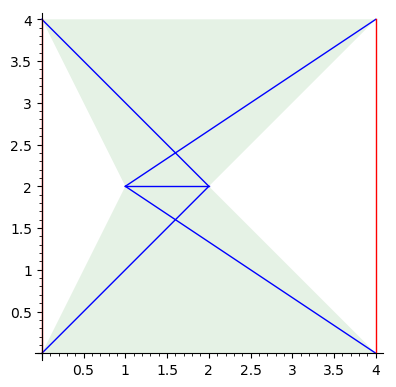

In [11]:
#5.2. Prueba cálculo diagonales externas e internas 
vertices_concavo = [[0, 0],[4, 0],[2, 2],[4, 4], [0, 4],[1, 2]]
internas, externas = calcularDiagonales(vertices_concavo)
print("Diagonales internas:", internas)
print("Diagonales externas:", externas)
g = polygon(vertices_concavo, fill=True, rgbcolor='green', alpha=0.1)
for (i, j) in internas:
    g += line([vertices_concavo[i], vertices_concavo[j]], rgbcolor='blue')
for (i, j) in externas:
    g += line([vertices_concavo[i], vertices_concavo[j]], rgbcolor='red')
g.show(aspect_ratio=1)

In [12]:
#6.1.Determine los vértices cóncavos y convexos del polígono
def clasificar_vertices_listas(poly):
    convexos, concavos, colineales = [], [], []
    n = len(poly)

    for i in range(n):
        v_anterior  = poly[(i-1) % n]
        v_actual    = poly[i]
        v_siguiente = poly[(i+1) % n]

        area = areaSignada(v_anterior, v_actual, v_siguiente)

        if area > 0:
            convexos.append((i, v_actual))
        elif area < 0:
            concavos.append((i, v_actual))
        else:
            colineales.append((i, v_actual))

    print(f"Número de vértices convexos: {len(convexos)}")
    print(f"Número de vértices cóncavos: {len(concavos)}")
    print(f"Número de vértices colineales: {len(colineales)}")

    return convexos, concavos, colineales

Número de vértices convexos: 5
Número de vértices cóncavos: 1
Número de vértices colineales: 1


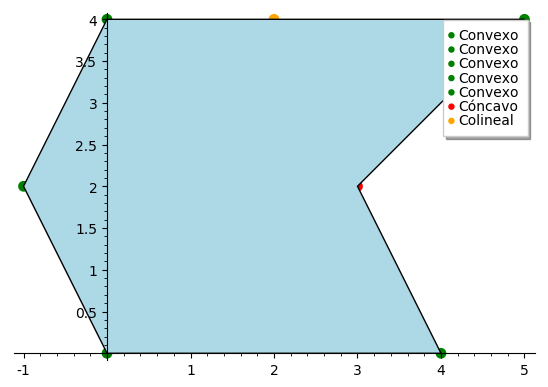

Vértices convexos: [[0, 0], [4, 0], [5, 4], [0, 4], [-1, 2]]
Vértices cóncavos: [[3, 2]]
Vértices colineales: [[2, 4]]


In [13]:
#6.2.Prueba de vértices convexos y cóncavos
def dibujar_clasificacion_vertices(poly):
    convexos, concavos, colineales = clasificar_vertices_listas(poly)
    G = polygon(poly, color='lightblue', edgecolor='black')
    if convexos:
        G += sum([point(v, color='green', size=60, legend_label="Convexo")
                  for _, v in convexos])
    if concavos:
        G += sum([point(v, color='red', size=60, legend_label="Cóncavo")
                  for _, v in concavos])
    if colineales:
        G += sum([point(v, color='orange', size=60, legend_label="Colineal")
                  for _, v in colineales])
    show(G)
    return convexos, concavos, colineales

vertices_mixto = [[0, 0],[4, 0],[3, 2],[5, 4],[2, 4],[0, 4],[-1, 2]]
convexos, concavos, colineales = dibujar_clasificacion_vertices(vertices_mixto)
print("Vértices convexos:", [v for _, v in convexos])
print("Vértices cóncavos:", [v for _, v in concavos])
print("Vértices colineales:", [v for _, v in colineales])


In [14]:
@interact
def applet_interactivo(puntos=slider(3, 12, 1, 5, label="Número de vértices")):
    import random #aquí también importamos para que no haya conflictos
    
    vertices = generar_poligono_simple(puntos)
    punto = (random.uniform(0, 10), random.uniform(0, 10))
    
    figura_poligono = polygon(vertices, color='lightgreen', edgecolor='black', alpha=0.5)
    
    es_convexo_resultado = PoligonoConvexo(vertices)
    
    interior_exterior = "Interior" if punto_en_poligono(vertices, punto) else "Exterior"
    
    hull = Graham(vertices)
    tangentes = tangentes_punto_poligono(punto, hull) if interior_exterior == "Exterior" else []
    
    area_poligono = areaPoligono(vertices)
    
    diagonales_internas, diagonales_externas = calcularDiagonales(vertices)
    
    convexos, concavos, colineales = clasificar_vertices_listas(vertices)
    
    G = figura_poligono
    
    hull = Graham(vertices)
    G += polygon(hull, color='lavender', edgecolor='black', alpha=0.4)
    G += sum([point(v, color='green', size=70) for v in hull])
    
    color_punto = 'blue' if interior_exterior == "Interior" else 'purple'
    G += point(punto, color=color_punto, size=60)
    
    #vértices
    G += sum([point(v, color='green', size=60) for _, v in convexos])
    G += sum([point(v, color='red', size=60) for _, v in concavos])
    G += sum([point(v, color='orange', size=60) for _, v in colineales])
    
    #diagonales
    G += sum([line([vertices[i], vertices[j]], color='blue', thickness=2) 
              for i,j in diagonales_internas])
    G += sum([line([vertices[i], vertices[j]], color='red', thickness=2) 
              for i,j in diagonales_externas])
    
    #tangentes
    G += sum([line([punto, hull[i]], color='orange', thickness=2) 
          for i in tangentes])
    show(G)
    
    print(f"Polígono Convexo: {es_convexo_resultado}")
    print(f"Punto {punto}: {interior_exterior}")
    if tangentes:
        print(f"Tangentes: {[vertices[i] for i in tangentes]}")
    print(f"Área del Polígono: {area_poligono}")
    print(f"Vértices Convexos: {[v for _, v in convexos]}")
    print(f"Vértices Cóncavos: {[v for _, v in concavos]}")
    print(f"Vértices Colineales: {[v for _, v in colineales]}")
    print(f"Diagonales internas: {diagonales_internas}")
    print(f"Diagonales externas: {diagonales_externas}")
    print(f"Envolvente convexa: {hull}")


Interactive function <function applet_interactivo at 0x6f7ffbce378> with 1 widget
  puntos: TransformIntSlider…